# GRIP : The Spark Foundation

# Data Science and Business Analytics Intern

# Author : Sourav Nautiyal

# Task 2: Prediction using Unsupervised ML

# Problem Definition:-
**From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually**

# Data:-
**Dataset is available at: https://bit.ly/3kXTdox**

# Importing required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import datasets
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset 

In [3]:
dataset=pd.read_csv('Iris - Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
dataset.shape

(150, 6)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Let's now take a look at the number of instances that belong to each class.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
# Checking for missing values
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#  Checking for missing value

In [41]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#  Checking for duplicate values

In [13]:
dataset.duplicated().sum()

0

# As There is no missing values and values are numerical, we can proceed.

<Figure size 432x288 with 0 Axes>

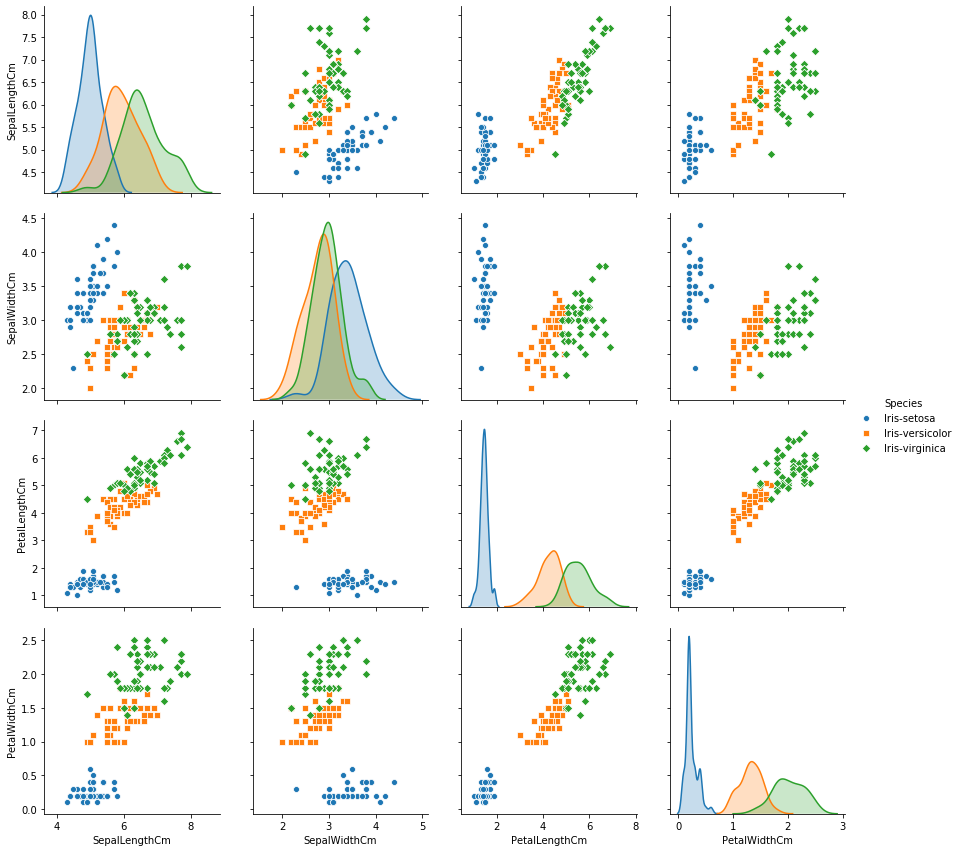

In [15]:
# Pairplt to visualize the distribution of variable 
#or the relationship between multiple variables 
#separately with subsets of your dataset.
plt.figure()
sns.pairplot(dataset.drop("Id", axis = 1), hue = 'Species', size = 3, markers = ["o", "s", "D"])
plt.show();

<Figure size 432x288 with 0 Axes>

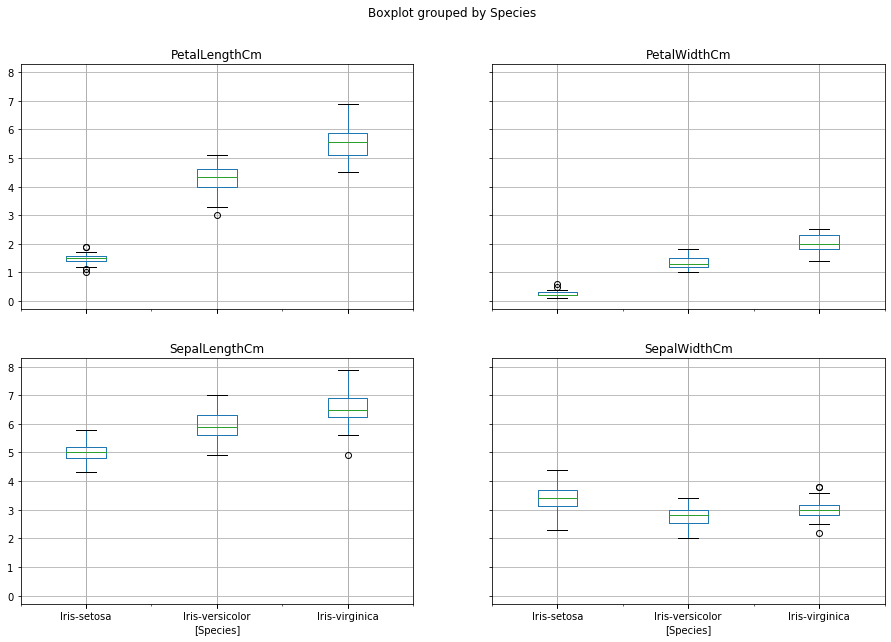

In [17]:
# Boxplot to know dispersion of the data set.
plt.figure()
dataset.drop("Id", axis = 1).boxplot(by = "Species", figsize = (15, 10))
plt.show();

In [24]:
from sklearn.preprocessing import LabelEncoder

X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

le = LabelEncoder()
y = le.fit_transform(y)

# Finding the optimum number of clusters
**We will implement 'The eblow method' which will allow us to pick the optimum amount of clusters.**

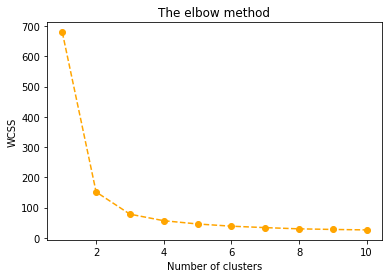

In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                  max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting to observe 'The elbow'
plt.plot(range(1, 11), wcss, "go--", color = 'orange')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

**We can see that WCSS doesn't decrease significantly with every iteration**


**From this we choose the number of clusters as 3**

In [26]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

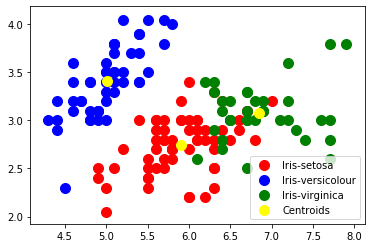

In [27]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [28]:
X[:3]*50

array([[255., 175.,  70.,  10.],
       [245., 150.,  70.,  10.],
       [235., 160.,  65.,  10.]])

In [29]:
kmeans.cluster_centers_

array([[5.9016129 , 2.74919355, 4.39354839, 1.43387097],
       [5.006     , 3.407     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

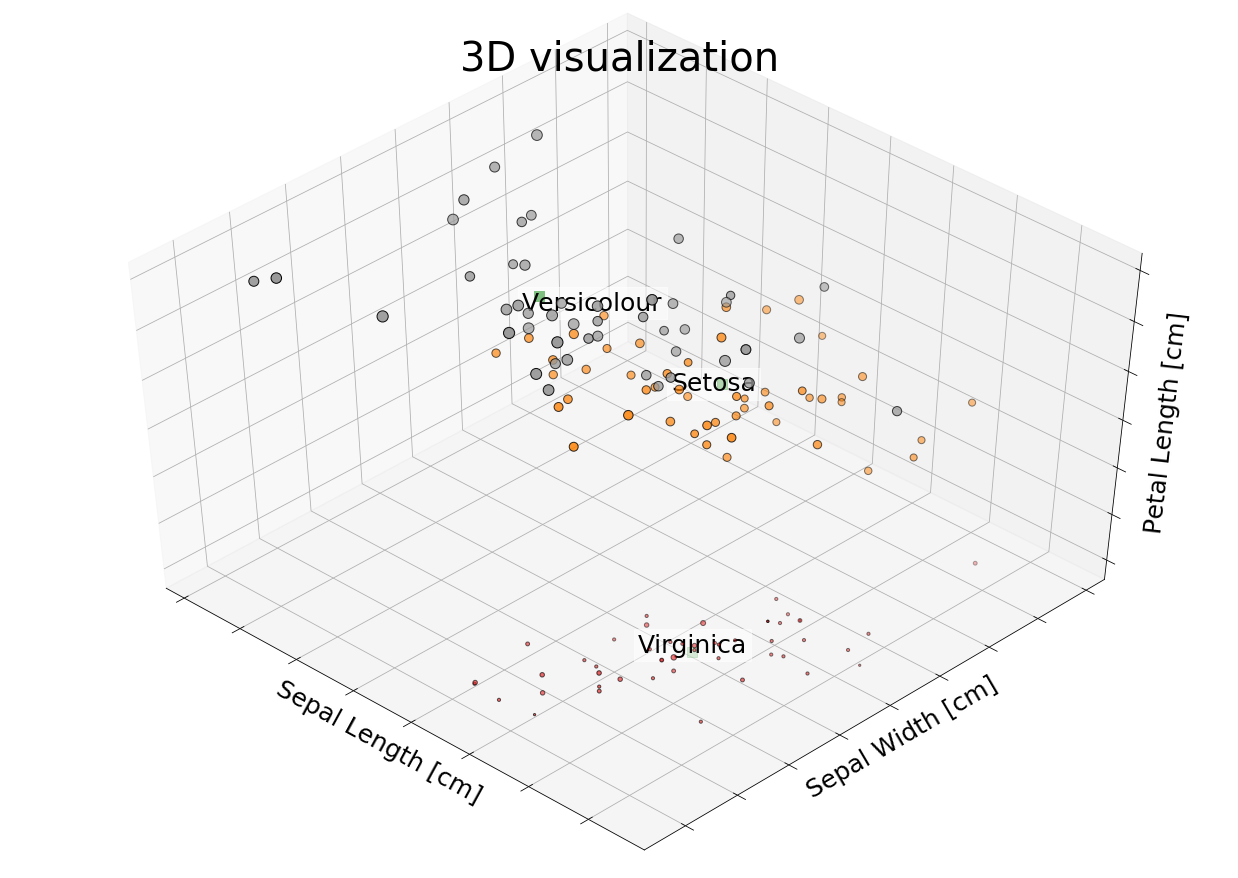

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(17, 12))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

ax.scatter(kmeans.cluster_centers_[:3, 0], kmeans.cluster_centers_[:3, 1], kmeans.cluster_centers_[:3, 2], marker = 's', c = 'green', s = 100 , label = 'centroids')

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show();

# Conculsion:

**The Optimum number of clusters is 3**

# *******Thank You*******